# Project 1

Group Member: Bryan Persaud, Matthew Baker, Zhi Ying Chen

For your first project, you are asked to

1. Identify and load a network dataset that has some categorical information available for each node.

2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.

3. Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import ttest_1samp
from IPython.display import SVG, display
from operator import itemgetter
from pandas import DataFrame

%matplotlib inline

First we import the Bitcoin OTC transaction database from Github. The dataset is about this is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research. 

Load dataset and take a quick look of the dataset

In [34]:
bitcoin = pd.read_csv("https://raw.githubusercontent.com/mharrisonbaker/DATA620/main/soc-sign-bitcoinotc.csv", header=None, names=['source', 'target', 'rating', 'time'])

bitcoin = bitcoin.drop(columns = ['time'])

bitcoin.head(10)

,source,target,rating
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
5,13,10,8
6,7,5,1
7,2,21,5
8,2,20,5
9,21,2,5


In [35]:
bitcoin.describe()

,source,target,rating
count,35592.000000,35592.000000,35592.000000
mean,2353.847269,2417.478254,1.012025
std,1605.771178,1658.232170,3.562094
min,1.000000,1.000000,-10.000000
25%,988.000000,978.000000,1.000000
50%,2125.000000,2178.000000,1.000000
75%,3722.000000,3804.000000,2.000000
max,6000.000000,6005.000000,10.000000


In [36]:
# built the graph
G = nx.from_pandas_edgelist(bitcoin, 'source', 'target', 'rating')

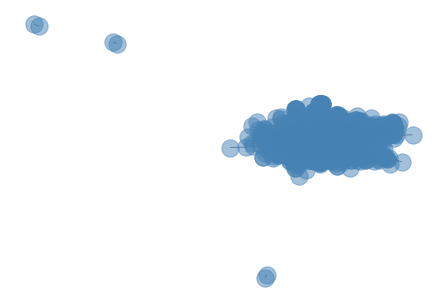

In [37]:
nx.draw_spring(G,with_labels = False, node_color="steelblue", alpha=0.5)

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5881
Number of edges: 21492
Average degree:   7.3090


In [7]:
print("Number of Nodes: " + str(nx.number_of_nodes(G)))
print("Number of Edges: " + str(nx.number_of_edges(G)))

Number of Nodes: 5881
Number of Edges: 21492


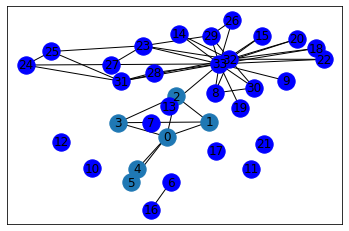

In [8]:
#as shown in the first visualization, our graph is disconnected, instead we find the diameter of the largest subgraph in the set
G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot']

pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res) 
plt.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
plt.show()

In [9]:
print("Diameter: " + str(nx.diameter(k)))

Diameter: 2


# Calculate Degree Centrality

Degree centrality is the simplest centrality measure to compute. Recall that a node's degree is simply a count of how many social connections (i.e., edges) it has. The degree centrality for a node is simply its degree. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1.

In [10]:
deg_centrality = nx.degree_centrality(G) # compute degree centrality for each node
eigen_centrality = nx.eigenvector_centrality(G) # compute eigenvector centrality for each node

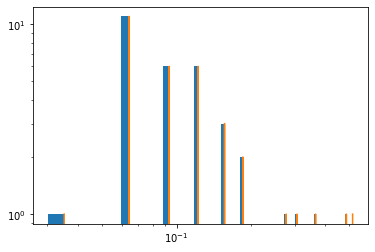

In [11]:
# display a histogram of node degrees in 100 bins
h = plt.hist(deg_centrality.values(), 100)
plt.loglog(h[1][1:], h[0])

In [12]:
df = pd.DataFrame.from_dict({
    'node': list(deg_centrality.keys()),
    'Deg_centrality': list(deg_centrality.values())
})
df = df.sort_values('Deg_centrality', ascending=False).reset_index(drop=True) 

# Find the Top 10 nodes by Degree centrality:
df[0:10]

,node,Deg_centrality
0,33,0.515152
1,0,0.484848
2,32,0.363636
3,2,0.303030
4,1,0.272727
5,3,0.181818
6,31,0.181818
7,23,0.151515
8,8,0.151515
9,13,0.151515


Text(0, 0.5, 'Frequency')

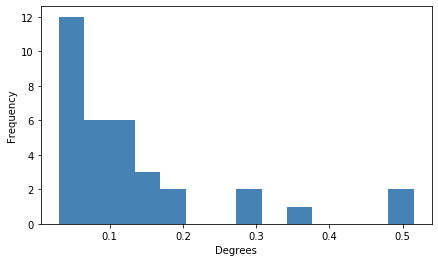

In [13]:
plt.figure(figsize=(7,4))
plt.hist(dict(deg_centrality).values(), 14, color = "steelblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')

The distribution of degrees in the network is heavily left skewed

# Calculate Eigenvector Centrality

In graph theory, eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Eigenvector centrality is a more sophisticated view of centrality: a node with a few connections could have a very high eigenvector centrality if those few connections were to very well-connected others. We can see some similarities within both measures.

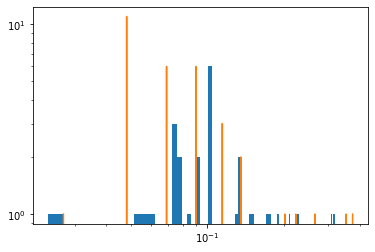

In [14]:
# display a histogram of node degrees in 100 bins
eigen_h = plt.hist(eigen_centrality.values(), 100)
plt.loglog(eigen_h[1][1:], h[0])

In [15]:
ds = pd.DataFrame.from_dict({
    'node': list(eigen_centrality.keys()),
    'Eigenvector': list(eigen_centrality.values())
})
ds = ds.sort_values('Eigenvector', ascending=False).reset_index(drop=True) 

# Find the Top 10 nodes by Eigenvector centrality:
ds[0:10]

,node,Eigenvector
0,33,0.373371
1,0,0.355483
2,2,0.317189
3,32,0.308651
4,1,0.265954
5,8,0.227405
6,13,0.226470
7,3,0.211174
8,31,0.191036
9,30,0.174760


Text(0, 0.5, 'Frequency')

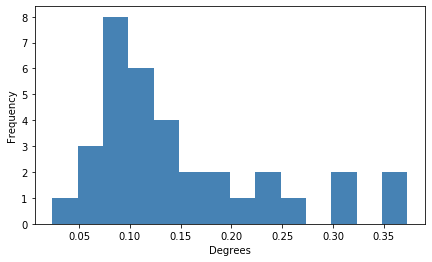

In [16]:
plt.figure(figsize=(7,4))
plt.hist(dict(eigen_centrality).values(), 14, color = "steelblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')

In [17]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.13903743315508021


Network density is the ratio of actual edges in the network to all possible edges in the network. 0 would mean that there are no connections at all, and 1 would indicate that all possible edges are present. In this case, the density of this network is approximately 0.13. So there is not a very dense network.

# T-Test

We will group the network into two sets as Untrust and Trust network: Data of rating <= 4 is grouped as Untrust group and data of rating >= 5 is treated as Trust group. We will perform a t-test to determine if there is a significant difference between the centrality measures of these two groups.

Our null hypothesis is that the mean of degree centrality is no difference between Untrust and Trust group. 

Likewise that the mean of eigenvector centrality is no difference between between Untrust and Trust group.

In [18]:
new_data = bitcoin.iloc[:, :3].copy()
data_untrust = new_data[new_data['rating'] <= 4].copy(deep=True)
data_trust = new_data[new_data['rating'] >= 5].copy(deep=True)

In [19]:
data_untrust = data_untrust.reset_index()
del data_untrust['index']
data_trust = data_trust.reset_index()
del data_trust['index']

G_data_untrust = nx.from_pandas_edgelist(data_untrust, "source", "target", "rating")
G_data_trust = nx.from_pandas_edgelist(data_trust, "source", "target", "rating")

In [20]:
data_untrust.count

<bound method DataFrame.count of        source  target  rating
0           6       2       4
1           6       5       2
2           1      15       1
3           7       5       1
4          17      23       1
...       ...     ...     ...
32696    1953    5655     -10
32697    1810    4499       2
32698    4499    1810       1
32699      13    1128       1
32700    1128      13       2

[32701 rows x 3 columns]>

In [21]:
data_trust.count

<bound method DataFrame.count of       source  target  rating
0          4       3       7
1         13      16       8
2         13      10       8
3          2      21       5
4          2      20       5
...      ...     ...     ...
2886     481    1810       6
2887    1018    2124       5
2888    5903    2045       5
2889    2731    3901       5
2890    2731    4897       5

[2891 rows x 3 columns]>

In [22]:
# Run degree centrality for untrust and trust
data_untrust_degree_dict = nx.degree_centrality(G_data_untrust) 
data_trust_degree_dict = nx.degree_centrality(G_data_trust) 

# Run eigenvector centrality for untrust and trust
data_untrust_eigenvector_dict = nx.eigenvector_centrality(G_data_untrust)
data_trust_eigenvector_dict = nx.eigenvector_centrality(G_data_trust)

In [23]:
untrust_sorted_degree = sorted(data_untrust_degree_dict.items(), key=itemgetter(1), reverse=True)
untrust_sorted_degree = DataFrame(untrust_sorted_degree, columns=['Node', 'Degree'])

trust_sorted_degree = sorted(data_trust_degree_dict.items(), key=itemgetter(1), reverse=True)
trust_sorted_degree = DataFrame(trust_sorted_degree, columns=['Node', 'Degree'])

In [24]:
untrust_sorted_eigenvector = sorted(data_untrust_eigenvector_dict.items(), key=itemgetter(1), reverse=True)    
untrust_sorted_eigenvector = DataFrame(untrust_sorted_eigenvector, columns=['Node', 'Eigenvenctor'])

trust_sorted_eigenvector = sorted(data_trust_eigenvector_dict.items(), key=itemgetter(1), reverse=True)
trust_sorted_eigenvector = DataFrame(trust_sorted_eigenvector,columns=['Node', 'Eigenvenctor'])

Let's calculate the T-test for Degree centrality

In [28]:
degree_diff = pd.merge(left = untrust_sorted_degree, right = trust_sorted_degree , on='Node', suffixes=['_l', '_r'])

degree_diff['difference'] = degree_diff.apply(lambda row: abs(row['Degree_l']-row['Degree_r']), axis=1)

print("t-test results for degree centrality: " + str(ttest_1samp(degree_diff['difference'], 0)))

t-test results for degree centrality: Ttest_1sampResult(statistic=16.352142651330862, pvalue=2.3780191965756208e-55)


Since the pvalue (2.3780191965756208e-55) is lesser than 0.05 and greated than 0, the null hypothesis is got rejected. We have statistical evidences to claim that there is a statistically difference in the degree centrality between Untrust and Trust nodes.

Let's calculate the T-test for Eigenvector centrality

In [29]:
eigenvector_diff = pd.merge(left = untrust_sorted_eigenvector, right = trust_sorted_eigenvector , on='Node', suffixes=['_l', '_r'])

eigenvector_diff['difference'] = eigenvector_diff.apply(lambda row: abs(row['Eigenvenctor_l']-row['Eigenvenctor_r']), axis=1)

print("t-test results for eigenvector centrality: " + str(ttest_1samp(eigenvector_diff['difference'], 0)))

t-test results for eigenvector centrality: Ttest_1sampResult(statistic=21.984181086416697, pvalue=7.63770407355221e-93)


Since the pvalue (7.63770407355221e-93) is lesser than 0.05 and greated than 0, the null hypothesis is got rejected. We have statistical evidences to claim that there is a statistically difference in the eigenvenctor centrality between Untrust and Trust nodes.